In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [2]:
# Генерируем уникальный seed
my_code = "Nikolay"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

np.random.seed(my_seed)

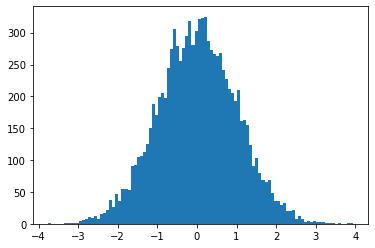

In [3]:
# Формируем случайную нормально распределенную выборку sample
N = 10000
sample = np.random.normal(0, 1, N)

plt.hist(sample, bins=100)
plt.show()

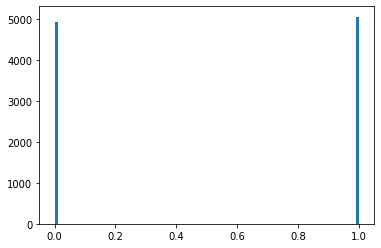

In [4]:
# Формируем массив целевых метока классов: 0 - если значение в sample меньше t и 1 - если больше
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])
plt.hist(target_labels, bins=100)
plt.show()

In [5]:
# Используя данные заготовки (или, при желании, не используя), 
# реализуйте функции для рассчета accuracy, precision, recall и F1

def confusion_matrix(target_labels, model_labels) :
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(target_labels)) :
        if target_labels[i] == 1 and model_labels[i] == 1 :
            tp += 1
        if target_labels[i] == 0 and model_labels[i] == 0 :
            tn += 1
        if target_labels[i] == 0 and model_labels[i] == 1 :
            fp += 1
        if target_labels[i] == 1 and model_labels[i] == 0 :
            fn += 1
    return tp, tn, fp, fn

def accuracy (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    return ((tp+tn)/(tp+fp+tn+fn))
def precision (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    return (tp/(tp+fp))

def recall (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    return (tp/(tp+fn))

def F1 (target_labels, model_labels) :
    tp, tn, fp, fn = confusion_matrix(target_labels, model_labels)
    return 2*((precision (target_labels, model_labels)*recall (target_labels, model_labels))/(precision (target_labels, model_labels)+recall (target_labels, model_labels)))

In [6]:
# Первый эксперимент: t = 0, модель с вероятностью 50% возвращает 0 и 1
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.random.randint(2, size=N)
print(accuracy (target_labels, model_labels))
print(precision (target_labels, model_labels))
print(recall (target_labels, model_labels))
print(F1 (target_labels, model_labels))

# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.

0.5007
0.5070821529745042
0.49496346039897293
0.5009495252373812


In [7]:
# Второй эксперимент: t = 0, модель с вероятностью 25% возвращает 0 и с 75% - 1
t = 0
target_labels = np.array([0 if i < t else 1 for i in sample])

labels = np.random.randint(4, size=N)
model_labels = np.array([0 if i == 0 else 1 for i in labels])
np.random.shuffle(model_labels)
print(accuracy (target_labels, model_labels))
print(precision (target_labels, model_labels))
print(recall (target_labels, model_labels))
print(F1 (target_labels, model_labels))
# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.

0.4989
0.5034918076819769
0.7404700770294292
0.599408425933328


In [8]:
# Проанализируйте, какие из метрик применимы в первом и втором экспериментах.

In [9]:
# Третий эксперимент: t = 2, модель с вероятностью 50% возвращает 0 и 1
t = 2
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.random.randint(2, size=N)
print(accuracy (target_labels, model_labels))
print(precision (target_labels, model_labels))
print(recall (target_labels, model_labels))
print(F1 (target_labels, model_labels))
# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.

0.5042
0.020656136087484813
0.45535714285714285
0.0395195660596668


In [10]:
# Четвёртый эксперимент: t = 2, модель с вероятностью 100% возвращает 0
t = 2
target_labels = np.array([0 if i < t else 1 for i in sample])

model_labels = np.zeros(N)
print(accuracy (target_labels, model_labels))
#print(precision (target_labels, model_labels)) деление на ноль
print(recall (target_labels, model_labels))
#print(F1 (target_labels, model_labels)) деление на ноль
# Рассчитайте и выведите значения метрик accuracy, precision, recall и F1.

0.9776
0.0


In [11]:
# Проанализируйте, какие из метрик применимы в третьем и четвёртом экспериментах.